# Project: Business Public Sentiment

Design a model to predict the sentiment (positive or negative) of text and apply it to the twitter feed of a business.


## Structure

Take a look at the files in the directory to better understand the structure of the project. 

- `data/`: Folder containing the training and test data.
- `models/`: Folder containing models.
    - `baseline_model.py`: A baseline model to start with.
    - `model.py`: The final model.


## Understanding the data-set

The training data was in a single cvs file which was over 200M in size so I've split the file into smaller files for easy of use. You can also see the testdata which is very small relative to the amount of training data.

In [1]:
print("List all the files in the data directory\n")
!ls data

List all the files in the data directory

training.500000.processed.noemoticon.csv


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from models.model import Model
%matplotlib inline

In [3]:
# Load the data
dataframe = pd.read_csv("data/training.500000.processed.noemoticon.csv", sep=',', names=['Labels','Id', 'Date', 'Query', 'User', 'Text'], encoding='ISO-8859-1', header=None)
dataframe.head()

,Labels,Id,Date,Query,User,Text
0,0,2205441133,Wed Jun 17 04:44:48 PDT 2009,NO_QUERY,Julie_oh,@tiedyeina lucky you! 6 more days
1,0,2205441225,Wed Jun 17 04:44:49 PDT 2009,NO_QUERY,KatieBug1112,Morning everyone! :-D not in a good mood righ...
2,0,2205441321,Wed Jun 17 04:44:50 PDT 2009,NO_QUERY,jbh_dc,Back in rainy reston ... With a wife who has t...
3,0,2205441485,Wed Jun 17 04:44:51 PDT 2009,NO_QUERY,aaakritiLove,"@jysla :S:S whats wrong, dear?"
4,0,2205441608,Wed Jun 17 04:44:52 PDT 2009,NO_QUERY,JackyDouglas,Hates the rain!


4    9477
0    8475
Name: Labels, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F03868390>,
      dtype=object)

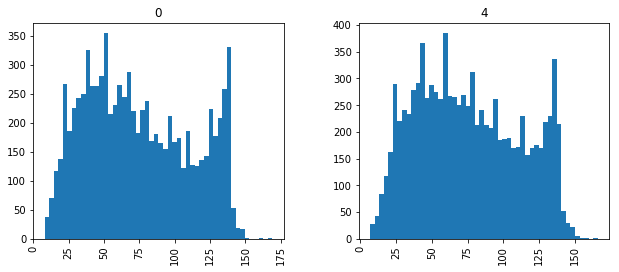

In [4]:
# Preprocess the data and display a histogram of the length of the text
dataframe_subset = dataframe[230000:247952] #dataframe[795000:805000] Midpoint: 238476
dataframe_subset = dataframe_subset.reset_index(drop=True)

#To check if the data is equally balanced between the target classes
print(dataframe_subset['Labels'].value_counts())

# I will only use the Text and Labels fields for this project so I will drop all other columms
twitterData = dataframe_subset.drop(columns=['Id', 'Date', 'Query', 'User'])
twitterLabelledData = dataframe_subset.drop(columns=['Id', 'Date', 'Query', 'User'])

# Group the Labels for histogram view
twitterData.groupby('Labels').describe()
twitterData['Length'] = twitterData['Text'].apply(len)
twitterData.hist(column = 'Length', by = 'Labels', bins = 50, figsize = (10, 4))

In [ ]:
# Convert the data to a frequency matrix
twitterText = twitterData.drop(columns=['Length', 'Labels'])
dfToA = twitterText.values.flatten()
count_vector = CountVectorizer(stop_words='english')
count_vector.fit(dfToA)
names = count_vector.get_feature_names()
doc_array = count_vector.transform(dfToA).toarray()

# Add the column names back in to show the frequency matrix
frequency_matrix = pd.DataFrame(data=doc_array, columns=names)
frequency_matrix.head()

,00,000,0000r0cx,0007,000th,00am,01,01000101,01614948343,018,...,½rmï,½s,½se,½stand,½t,½tï,½ve,½y,½ï,ã¼ã
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Baseline Model

The baseline model for this project is the multinomial Naïve Bayes model.  
See models/BaselineModel for detail.

In splitData
 
Number of rows in the total set: 17952
Number of rows in the training set: 13464
Number of rows in the test set: 4488
 
   Labels                                               Text
0       0                               i need holiday...   
1       0                @MsA1sinceday1 forgot about me  lol
2       0  I'm not sure why I bother fixing my hair in th...
3       0  @MaryRincon its mystery disease, i'm negative ...
4       0  I miss L.A!!! And I miss my aunt!!!!And Carlos...
 
In cvDataset
   00  000  0007  000th  01  01000101  01614948343  018  01yt  02 ...   ½nes  \
0   0    0     0      0   0         0            0    0     0   0 ...      0   
1   0    0     0      0   0         0            0    0     0   0 ...      0   
2   0    0     0      0   0         0            0    0     0   0 ...      0   
3   0    0     0      0   0         0            0    0     0   0 ...      0   
4   0    0     0      0   0         0            0    0     0   0 ...      0   

   

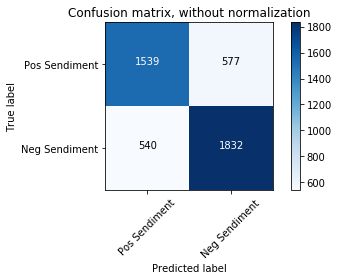

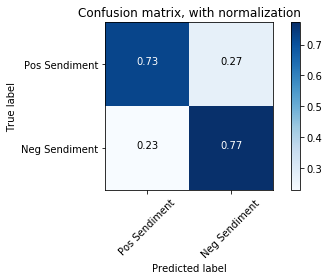

In [ ]:
# Create, fit and test the baseline model
from models.baseline_model import BaselineModel

baseline_model = BaselineModel(twitterLabelledData, debug=True)
baseline_model.splitData()
baseline_model.cvDataset()
baseline_model.fit()
baseline_model.predict()
baseline_model.printScores()
baseline_model.plotConfusionMatrix()
baseline_model.getTextSentiment(text="Superb, this companies after sale service is great :-)")
baseline_model.getTextSentiment(text="Argh, this companies website is crap")
baseline_model.saveModelAndVector()

# Model

The main model for this project is the SVM (Support Vector Machine) model.  
See models/Model for detail.  
  
As you can see from the code below I try the model twice, first with CountVectorizer and then with TfidfVectorizer.

In splitData
 
Number of rows in the total set: 17952
Number of rows in the training set: 13464
Number of rows in the test set: 4488
 
   Labels                                               Text
0       0                               i need holiday...   
1       0                @MsA1sinceday1 forgot about me  lol
2       0  I'm not sure why I bother fixing my hair in th...
3       0  @MaryRincon its mystery disease, i'm negative ...
4       0  I miss L.A!!! And I miss my aunt!!!!And Carlos...
 
In cvDataset
   00  000  0007  000th  01  01000101  01614948343  018  01yt  02 ...   ½nes  \
0   0    0     0      0   0         0            0    0     0   0 ...      0   
1   0    0     0      0   0         0            0    0     0   0 ...      0   
2   0    0     0      0   0         0            0    0     0   0 ...      0   
3   0    0     0      0   0         0            0    0     0   0 ...      0   
4   0    0     0      0   0         0            0    0     0   0 ...      0   

   

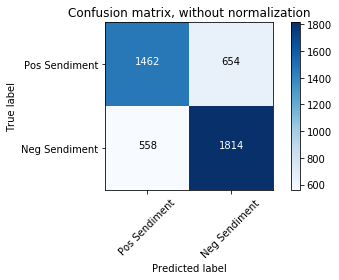

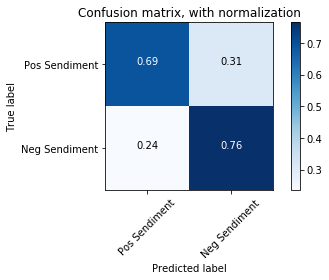

In [ ]:
# Create, fit and test the SVM model with CountVectorizer
cvmodel = Model(twitterLabelledData, debug=True)
cvmodel.splitData()
cvmodel.cvDataset()
cvmodel.fit()
cvmodel.predict()
cvmodel.printScores()
cvmodel.plotConfusionMatrix()
cvmodel.getTextSentiment(text="Superb, this companies after sale service is great :-)")
cvmodel.getTextSentiment(text="Argh, this companies website is crap")
cvmodel.saveModelAndVector()

In [ ]:
# Create, fit and test the SVM model with TfidfVectorizer
tfidfmodel = Model(twitterLabelledData, debug=True)
tfidfmodel.splitData()
tfidfmodel.tfidfDataset()
tfidfmodel.fit()
tfidfmodel.predict()
tfidfmodel.printScores()
tfidfmodel.plotConfusionMatrix()
tfidfmodel.getTextSentiment(text="Superb, this companies after sale service is great :-)")
tfidfmodel.getTextSentiment(text="Argh, this companies website is crap")
tfidfmodel.saveModelAndVector()

In splitData
 
Number of rows in the total set: 17952
Number of rows in the training set: 13464
Number of rows in the test set: 4488
 
   Labels                                               Text
0       0                               i need holiday...   
1       0                @MsA1sinceday1 forgot about me  lol
2       0  I'm not sure why I bother fixing my hair in th...
3       0  @MaryRincon its mystery disease, i'm negative ...
4       0  I miss L.A!!! And I miss my aunt!!!!And Carlos...
 
In tfidfDataset
    00  000  0007  000th   01  01000101  01614948343  018  01yt   02 ...   \
0  0.0  0.0   0.0    0.0  0.0       0.0          0.0  0.0   0.0  0.0 ...    
1  0.0  0.0   0.0    0.0  0.0       0.0          0.0  0.0   0.0  0.0 ...    
2  0.0  0.0   0.0    0.0  0.0       0.0          0.0  0.0   0.0  0.0 ...    
3  0.0  0.0   0.0    0.0  0.0       0.0          0.0  0.0   0.0  0.0 ...    
4  0.0  0.0   0.0    0.0  0.0       0.0          0.0  0.0   0.0  0.0 ...    

   ½nes  ½re  ½rmï